In [1]:
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import xarray as xr
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable1='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT']

In [3]:
sourceData1='/bettik/amoryc/MARout/GRa/spin2/work/'
dsM_SF= xr.open_dataset(sourceData1+'mon-SF-MARv3.14_ER5-2000-2023.nc')['SF']
dsM_RF= xr.open_dataset(sourceData1+'mon-RF-MARv3.14_ER5-2000-2023.nc')['RF']
dsMP=dsM_RF+dsM_SF
dsMP = dsMP.rename({'TIME': 'time'})

In [4]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [5]:
#Gra Mera 5km
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT'][:,1,:,:] ## montlhy mean

In [6]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
###
#Prendre la grille correspondant à MeraLa+1nord ( i,j+1)
lon_Pyramide=86.8131
lat_Pyramide=27.9592
elev_Pyramide=4260
##Find the pixel of MAR corresponding to station
target_lon = lon_Pyramide
target_lat = lat_Pyramide
lon=ds_grM.LON
lat=ds_grM.LAT

In [7]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.29168  , 5.2452683, 5.1989226, ..., 3.7861106, 3.8288114,
        3.871683 ],
       [5.275839 , 5.22927  , 5.182763 , ..., 3.763061 , 3.8060236,
        3.849188 ],
       [5.260335 , 5.2135935, 5.1669264, ..., 3.7404037, 3.783647 ,
        3.8270772],
       ...,
       [5.8987594, 5.854672 , 5.8107076, ..., 4.505558 , 4.543619 ,
        4.581937 ],
       [5.923435 , 5.879504 , 5.835715 , ..., 4.536913 , 4.5747414,
        4.6128225],
       [5.948347 , 5.9045897, 5.8609495, ..., 4.568512 , 4.6060896,
        4.643947 ]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0


In [8]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta=dsM[0:, i, j-2]
dsM_sta_precip=dsMP[0:, i, j-2]




dsM_sta_new2= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
dsM_sta_new= dsM_sta_new2.where(dsM_sta_new2.values <= 70)
#dsM_sta_new.values


In [9]:
#Evaluer la différence de hauteur entre la station et le niveau 1 de la grille MAR considérée
SH_sta=elev_Pyramide
value = ds_grM['SH'].isel(y=j-2, x=i)
diff=SH_sta-value.values
value.values, diff

(array(4348.5386, dtype=float32), np.float32(-88.538574))

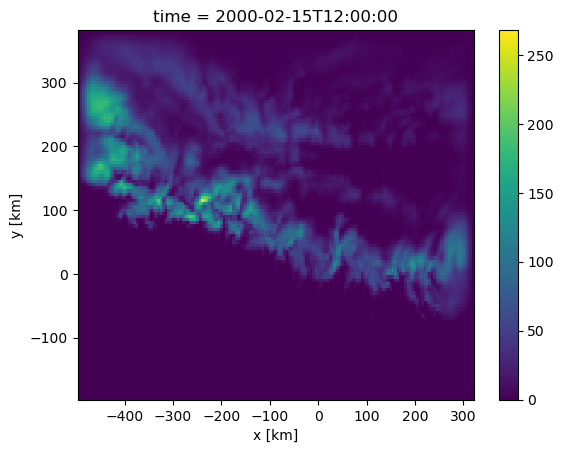

In [10]:
dsMP[1,:,:].plot()

In [11]:
####
## Opening station data
####

In [12]:
path ="/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_precip/Precipitation_Pyramid_Pheriche_corrected_Apr2016_Nov2023_final.xlsx"
xl_data=pd.ExcelFile(path)
print(xl_data)

In [13]:
dfs = {sheet_name: xl_data.parse(sheet_name) 
       for sheet_name in xl_data.sheet_names}
DataPyramid_Pheriche16_23=dfs['Precip_data_Apr16_Nov23']

In [14]:
NameVarsPP16_23=['TimeY','TairY','uY','RHY','WMOphaseY','RRYhourly','RRYcumul','TimeH','TairH','uH','RHh','WMOphaseH','RRHhourly','RRHcumul']
UnitVarsPP16_23=['data/hour','(°C)','(ms-1)','(%)','mm','mm','data/hour','(°C)','(ms-1)','(%)','mm','mm',]


In [15]:
dfile1P16_23= pd.DataFrame(data=DataPyramid_Pheriche16_23.loc[10:57630]) #3399 marche, Toujours la même taille jusque 3399 puis toujours lenght var=t-1 par la suite 
#CHANGEMENT DANS TIME:3389 	2016-09-15 17:59:59.!999! / 2016-09-15 18:59:59.!998! 
#donc erreur à chaque changement de décimale, corriger cette data avant tout autre chose



dfile2P16_23=pd.DataFrame(data=DataPyramid_Pheriche16_23.loc[57632:]) 

In [16]:
df1P16_23=pd.DataFrame(dfile1P16_23.values, columns=NameVarsPP16_23)
df2P16_23=pd.DataFrame(dfile2P16_23.values, columns=NameVarsPP16_23)
df1P16_23['TimeY'] = df1P16_23['TimeY'].dt.round('h')
df2P16_23['TimeY'] = df2P16_23['TimeY'].dt.round('30min')


In [17]:
def NewTime(df, NameVar, values, freq):
	time = pd.to_datetime(df['TimeY'].values)
	ds = xr.Dataset({NameVar: ("time", np.asarray(values))}, coords={"time": time})
	return ds
# Time step: 1h
RRY1 = [float(i) for i in df1P16_23['RRYhourly'].values]

TY1 = [float(i) for i in df1P16_23['TairY'].values]

dsY1 = NewTime(df1P16_23, 'RRYhourly', RRY1, '1h')

dsTY1 =  NewTime(df1P16_23, 'TairY', TY1, '1h')


# Time step : 30 min 
RRY2 = [float(i) for i in df2P16_23['RRYhourly'].values]

TY2=[float(i) for i in df2P16_23['TairY'].values]
dsY2 = NewTime(df2P16_23, 'RRYhourly', RRY2, '30min')

dsTY2 =  NewTime(df2P16_23, 'TairY', TY2, '30min')

T = xr.concat([dsTY1, dsTY2], dim='time')

RR = xr.concat([dsY1, dsY2], dim='time')


In [18]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name):  #monthly_meanTM.sel(time=monthly_meanTM['time'].dt.month.isin(seasons['MAM'])). Sélectionne dans le dataset les mois correspondants aux saisons définies au dessus

	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


daily_meanRRY=RRY.resample(time='D').sum()                          #Utilisation de la librairie xarray maintenant possible car les données ont une forme bien définie
monthly_meanRRY=daily_meanRRY.resample(time='ME').sum()             # chaque variable ici défini est un xarray.Dataset
yearly_meanRRY=monthly_meanRRY.resample(time='YE').sum()


daily_meanT=T.resample(time='D').mean() 
monthly_meanT=daily_meanT.resample(time='ME').mean()             # chaque variable ici défini est un xarray.Dataset
yearly_meanT=monthly_meanT.resample(time='YE').mean()


In [19]:
#nouvelles fonctions.
def Clim_mean(ds, variable):
    daily = ds[variable].resample(time='D').mean()
    monthly = daily.resample(time='ME').mean()
    yearly = monthly.resample(time='YE').mean()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }
    
def Clim_sum(ds, variable):
    daily = ds[variable].resample(time='D').sum()
    monthly = daily.resample(time='ME').sum()
    yearly = monthly.resample(time='YE').sum()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }


In [20]:
Clim_temp_Pyramide=Clim_mean(T,'TairY')

Clim_precip_Pyramide=Clim_sum(RR,'RRYhourly')


In [21]:
# Get the time coordinates CORRIGER DIFF ENTRE MAR ET STATION
time1 = Clim_temp_Pyramide['monthly']['time']# début 
time2 = dsM_sta_new['time'] # début 
start=time1[0] 
end=time2[-1]

In [22]:

Pr_sta=Clim_precip_Pyramide['monthly'].sel(time=slice(start,end))
Pr_MAR=dsM_sta_precip.sel(time=slice(start,end))
Ts_MAR=dsM_sta_new.sel(time=slice(start,end))

In [23]:
#Nouvelles fonctions.
# Precip sta classic climatic variables 
def seasonal_annual_Precip(datasets, seasons):

    return {
        name: {
            season: seasonsdata(ds, season).resample(time='YE').sum()
            for season in seasons
        }
        for name, ds in datasets.items()
    }
def seasonal_annual_Temp(datasets, seasons):

    return {
        name: {
            season: seasonsdata(ds, season).resample(time='YE').mean()
            for season in seasons
        }
        for name, ds in datasets.items()
    }



In [24]:
Pr_MAR
#T MAR classic climate variables
PrMAR_monthly_cycle=Pr_MAR.groupby('time.month').sum()

#dsM_sta_new


PrMAR_premon = seasonsdata(Pr_MAR, 'MAM').resample(time='YE').sum()

PrMAR_mon = seasonsdata(Pr_MAR, 'JJAS').resample(time='YE').sum()

PrMAR_postmon =  seasonsdata(Pr_MAR, 'ON').resample(time='YE').sum()

PrMAR_hiver  = seasonsdata(Pr_MAR, 'DJF').resample(time='YE').sum()


#Time series annual data MAR 
Timeseries_PrMAR_premon = seasonsdata(Pr_MAR, 'MAM').resample(time='YE').sum() # T moyen de chaque saison 
Timeseries_PrMAR_mon = seasonsdata(Pr_MAR, 'JJAS').resample(time='YE').sum()
Timeseries_PrMAR_postmon =  seasonsdata(Pr_MAR, 'ON').resample(time='YE').sum()
Timeseries_PrMAR_hiver  = seasonsdata(Pr_MAR, 'DJF').resample(time='YE').sum()



In [25]:


seasonal_precip= seasonal_annual_Precip(Pr_sta, seasons)

seasonap_Temp=seasonal_annual_Temp(T,seasons)



In [26]:
seasonal_precip['RRYhourly']['MAM']

<xarray.DataArray 'RRYhourly' (time: 8)> Size: 64B
array([ 31.83712516, 101.61775655,  94.61455797, 103.05629559,
       128.95648427, 189.81913241,  50.96184663, 121.71986763])
Coordinates:
  * time     (time) datetime64[ns] 64B 2016-12-31 2017-12-31 ... 2023-12-31

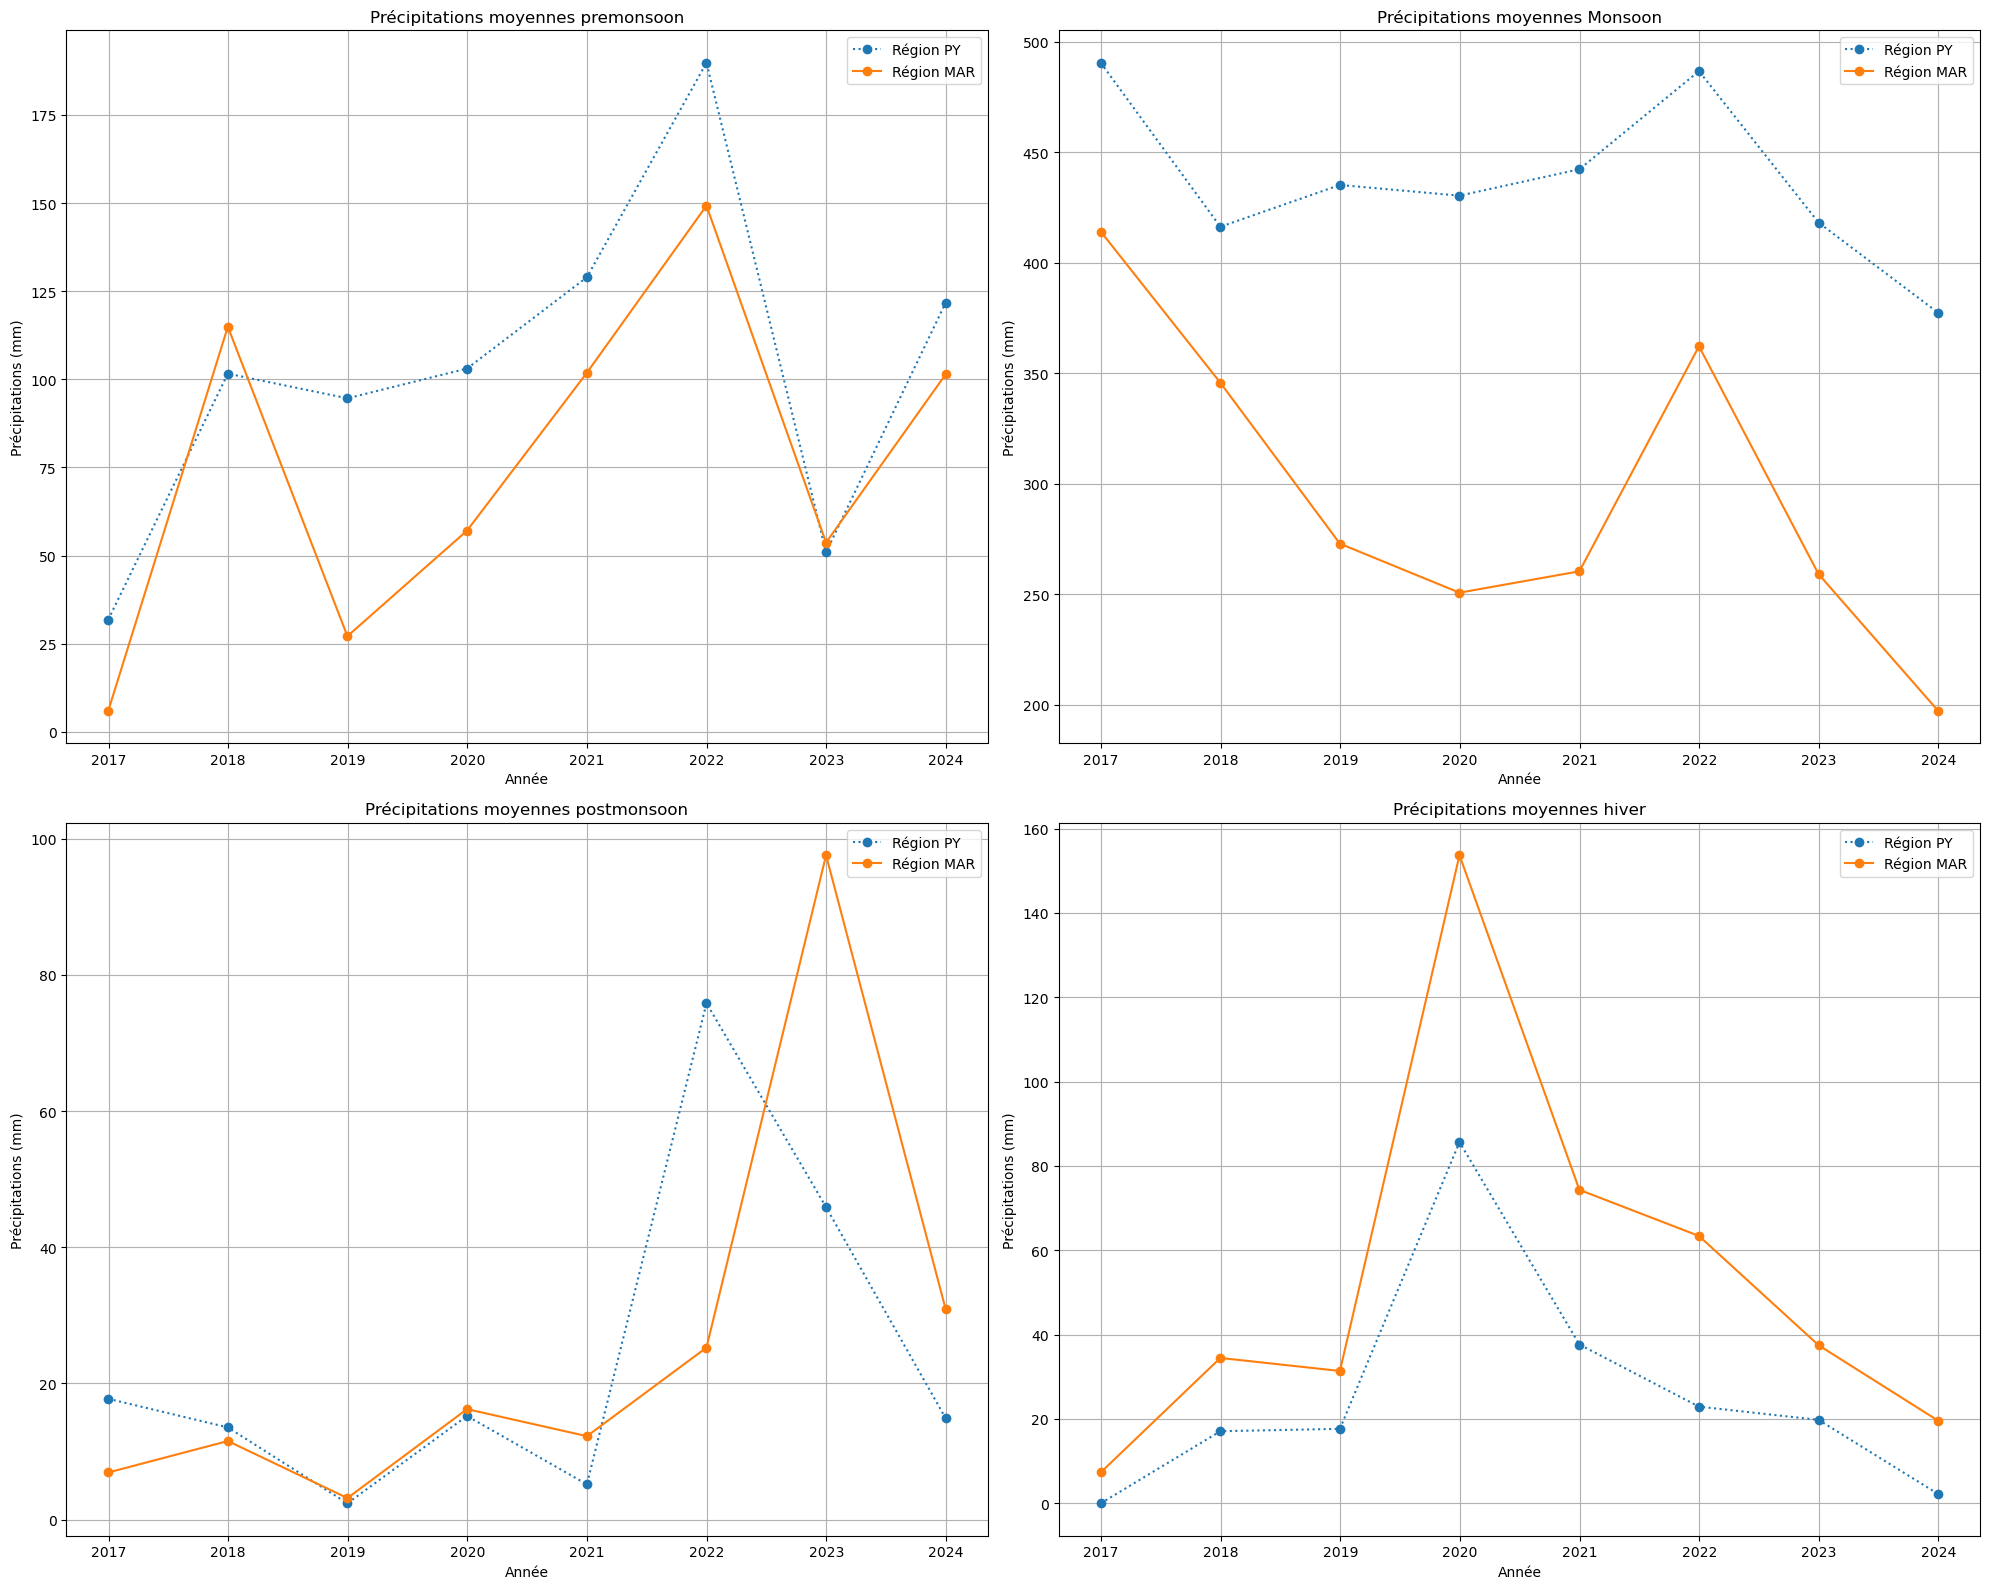

In [27]:

titles = {
    'MAM': 'Précipitations moyennes premonsoon',
    'JJAS': 'Précipitations moyennes Monsoon',
    'ON': 'Précipitations moyennes postmonsoon',
    'DJF': 'Précipitations moyennes hiver',
}

TS_MAR_precip_dic = {
    'MAM': Timeseries_PrMAR_premon,
    'JJAS': Timeseries_PrMAR_mon,
    'ON': Timeseries_PrMAR_postmon,
    'DJF': Timeseries_PrMAR_hiver,
}

# Création de la figure
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]

    # Série de données RRY (station ou pyramide)
    da_py = seasonal_precip['RRYhourly'][season]
    # Série de données MAR
    da_mar = TS_MAR_precip_dic[season]

    # Tracés
    ax.plot(da_py.time, da_py.values, linestyle=':', marker='o', label='Région PY')
    ax.plot(da_mar.time, da_mar.values, linestyle='-', marker='o', label='Région MAR')

    # Mise en forme
    ax.set_title(titles[season])
    ax.set_xlabel('Année')
    ax.set_ylabel('Précipitations (mm)')
    ax.grid(True)
    ax.legend()

# Ajustement de l’espacement
plt.tight_layout()
plt.show()


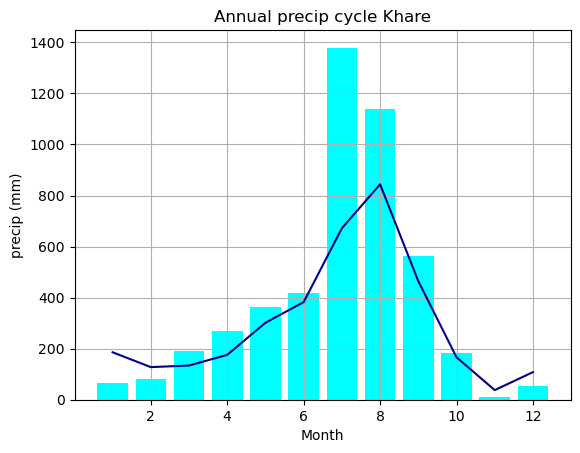

In [28]:
#Annual cycle 
#daily_meanRR=RR.resample(time='D').sum()  
Précip_yearly_cycle=Clim_precip_Pyramide['monthly'].groupby('time.month').sum()


plt.bar(Précip_yearly_cycle.month,Précip_yearly_cycle.RRYhourly,
        color='cyan',linestyle='-',label='Précip Station')
plt.plot(PrMAR_monthly_cycle.month,PrMAR_monthly_cycle.values,
         color='darkblue',linestyle='-',label='Précip MAR')
    
plt.title('Annual precip cycle Khare')
plt.xlabel('Month')
plt.ylabel('precip (mm)')

plt.grid(True)

In [29]:

#T sta classic climatic variables 

ts_sta=Clim_temp_Pyramide['monthly']

Tsta_monthly_cycle=ts_sta.groupby('time.month').mean()
Tsta_premon = seasonsdata(ts_sta, 'MAM').groupby('time.month').mean()

Tsta_mon = seasonsdata(ts_sta, 'JJAS').groupby('time.month').mean()

Tsta_postmon =  seasonsdata(ts_sta, 'ON').groupby('time.month').mean()

Tsta_hiver  = seasonsdata(ts_sta, 'DJF').groupby('time.month').mean()

#Time series annual data sta
Timeseries_Tsta_premon = seasonsdata(ts_sta, 'MAM').resample(time='YE').mean() # T moyen de chaque saison 
Timeseries_Tsta_mon = seasonsdata(ts_sta, 'JJAS').resample(time='YE').mean()
Timeseries_Tsta_postmon =  seasonsdata(ts_sta, 'ON').resample(time='YE').mean()
Timeseries_Tsta_hiver  = seasonsdata(ts_sta, 'DJF').resample(time='YE').mean()


In [30]:
#T MAR classic climate variables
TMAR_monthly_cycle=Ts_MAR.groupby('time.month').mean()

#dsM_sta_new


TMAR_premon = seasonsdata(Ts_MAR, 'MAM').groupby('time.month').mean()

TMAR_mon = seasonsdata(Ts_MAR, 'JJAS').groupby('time.month').mean()

TMAR_postmon =  seasonsdata(Ts_MAR, 'ON').groupby('time.month').mean()

TMAR_hiver  = seasonsdata(Ts_MAR, 'DJF').groupby('time.month').mean()


#Time series annual data MAR 
Timeseries_TMAR_premon = seasonsdata(Ts_MAR, 'MAM').resample(time='YE').mean() # T moyen de chaque saison 
Timeseries_TMAR_mon = seasonsdata(Ts_MAR, 'JJAS').resample(time='YE').mean()
Timeseries_TMAR_postmon =  seasonsdata(Ts_MAR, 'ON').resample(time='YE').mean()
Timeseries_TMAR_hiver  = seasonsdata(Ts_MAR, 'DJF').resample(time='YE').mean()





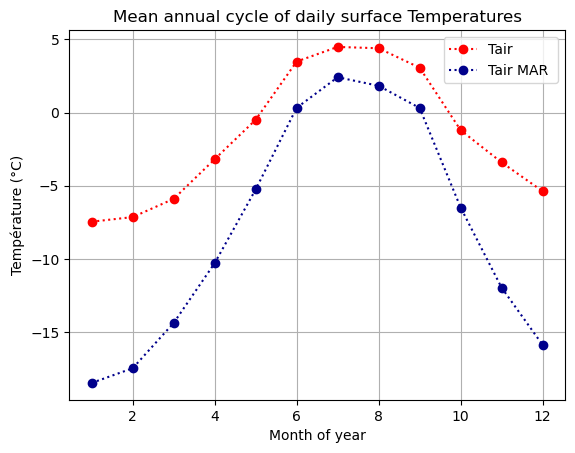

In [31]:
#Monthly cycle

plt.plot(Tsta_monthly_cycle.month,Tsta_monthly_cycle.TairY,
    color='red',linestyle=':', marker= 'o',label='Tair')

plt.plot(TMAR_monthly_cycle.month,TMAR_monthly_cycle.values,
         color='darkblue',linestyle=':', marker= 'o',label='Tair MAR ')
plt.legend()
plt.title('Mean annual cycle of daily surface Temperatures')
plt.xlabel('Month of year')
plt.ylabel('Température (°C)')

plt.grid(True)

Text(0.5, 0.98, 'Seasonsal Comparaisons between MAR model and Khare stations data')

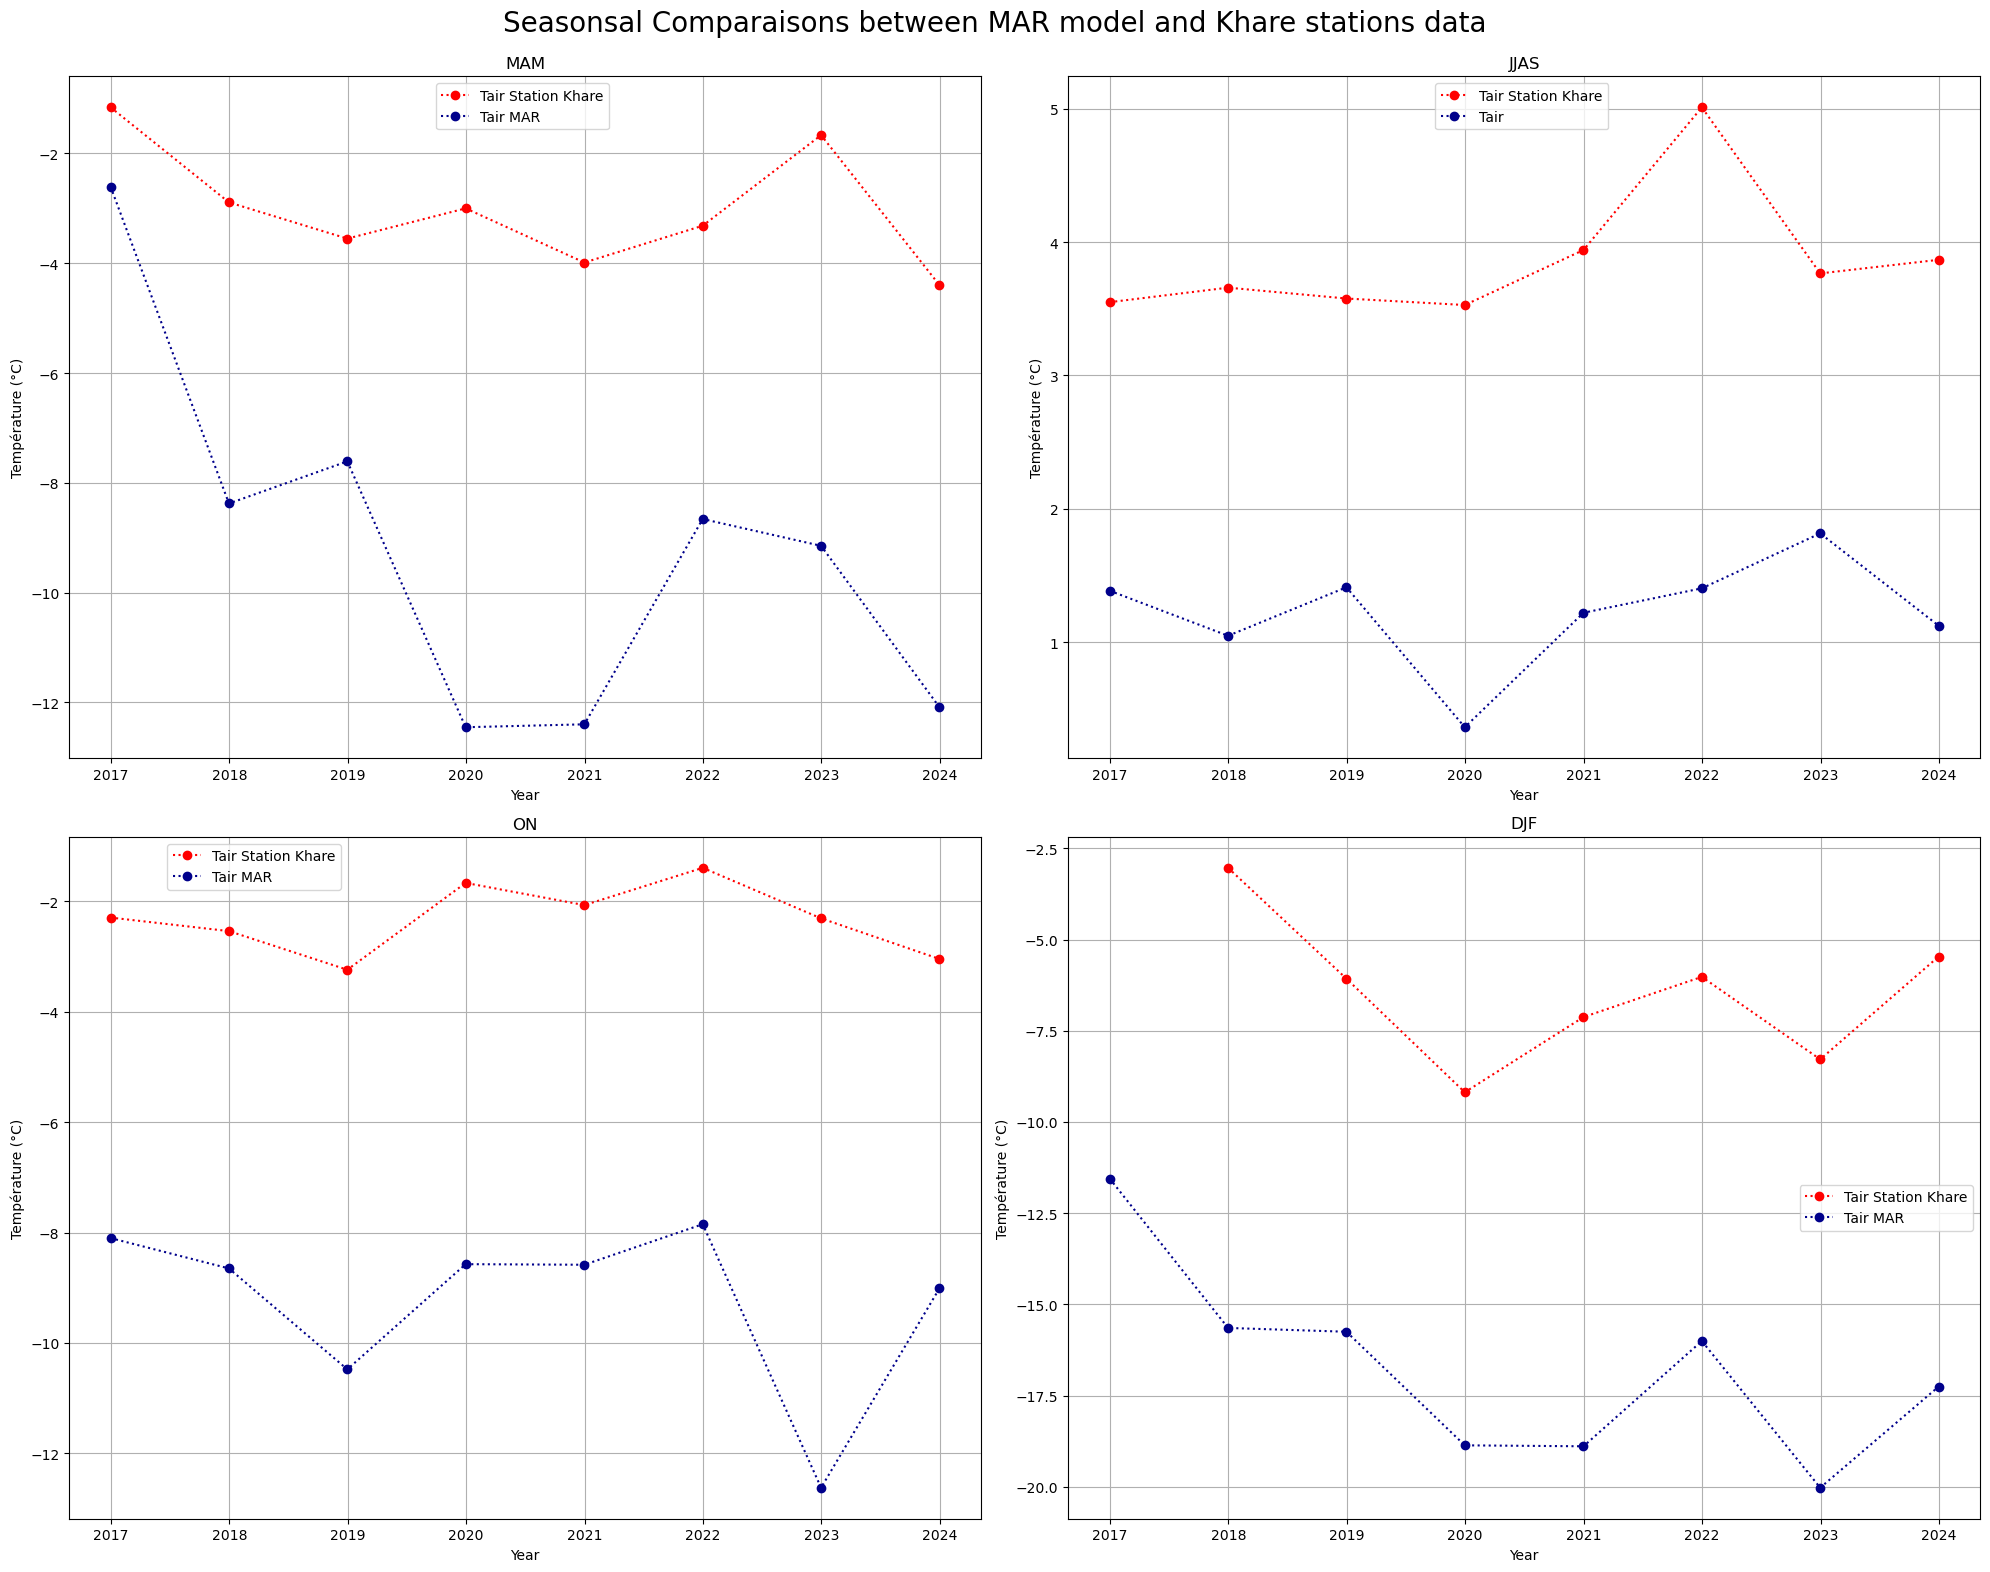

In [32]:
#Ajout incertitudes, 

fig, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(2,2, figsize=(20,16))
ax1.plot(Timeseries_Tsta_premon.time, Timeseries_Tsta_premon['TairY'].values,color='red', linestyle=':', marker= 'o', label='Tair Station Khare')
ax1.plot(Timeseries_TMAR_premon.time, Timeseries_TMAR_premon.values,color='darkblue', linestyle=':', marker= 'o', label='Tair MAR')


ax1.legend(bbox_to_anchor=(0.1, 0.5, 0.5, 0.5)) 
ax1.set_title('MAM')
ax1.set_xlabel('Year')
ax1.set_ylabel('Température (°C)')
ax1.grid()

ax2.plot(Timeseries_Tsta_mon.time, Timeseries_Tsta_mon['TairY'].values,color='red', linestyle=':',marker= 'o', label='Tair Station Khare')
ax2.plot(Timeseries_TMAR_mon.time, Timeseries_TMAR_mon.values, linestyle=':',color='darkblue', marker= 'o', label='Tair')



ax2.legend(bbox_to_anchor=(0.1, 0.5, 0.5, 0.5)) 
ax2.set_title('JJAS')
ax2.set_xlabel('Year')
ax2.set_ylabel('Température (°C)')
ax2.grid()

ax3.plot(Timeseries_Tsta_postmon.time, Timeseries_Tsta_postmon['TairY'].values,color='red', linestyle=':', marker= 'o', label='Tair Station Khare')
ax3.plot(Timeseries_TMAR_postmon.time, Timeseries_TMAR_postmon.values,color='darkblue', linestyle=':', marker= 'o', label='Tair MAR')


ax3.legend(bbox_to_anchor=(0.1, 0.5, 0.5, 0.5)) 
ax3.set_title('ON')
ax3.set_xlabel('Year')
ax3.set_ylabel('Température (°C)')
ax3.grid()

ax4.plot(Timeseries_Tsta_hiver.time, Timeseries_Tsta_hiver['TairY'].values, color='red',linestyle=':', marker= 'o', label='Tair Station Khare')
ax4.plot(Timeseries_TMAR_hiver.time, Timeseries_TMAR_hiver.values,color='darkblue', linestyle=':', marker= 'o', label='Tair MAR')

ax4.legend(bbox_to_anchor=(0.5, 0, 0.5, 0.5)) 
ax4.set_title('DJF')
ax4.set_xlabel('Year')
ax4.set_ylabel('Température (°C)')
ax4.grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Maria script theft : leave space for the suptitle
fig.suptitle('Seasonsal Comparaisons between MAR model and Khare stations data',fontsize=20)